In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
import visualize
import world_generator
import evaluation
import projections

In [3]:
N_a, M_a, g_ba = world_generator.generate_world(num_regions=256, spread_rate=0.2, self_spread_rate=2.0)
N_a, M_a, g_ba

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [4]:
N_a.shape, M_a.shape, g_ba.shape

((256,), (256, 256), (64, 256))

In [5]:
grid_N_a_0 = visualize.as_grid(N_a)
grid_N_a_0.shape

(16, 16)

In [6]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a, num_steps=10, intervention_strategy=False)

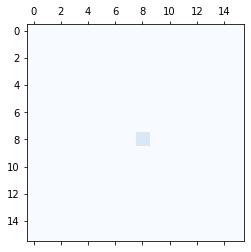

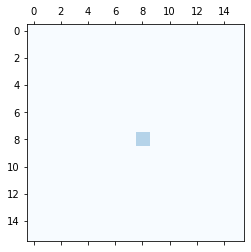

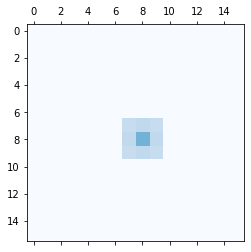

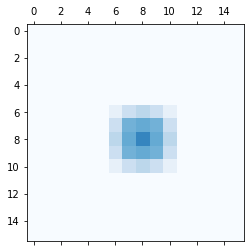

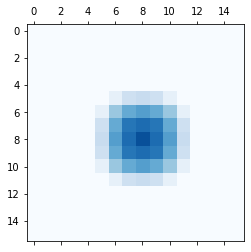

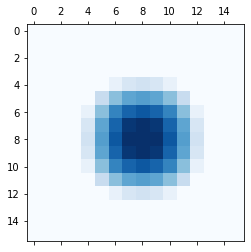

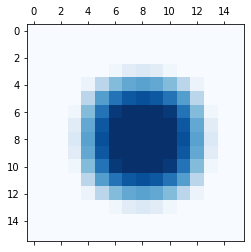

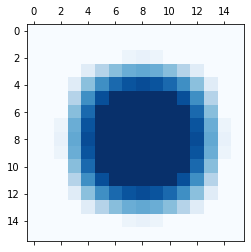

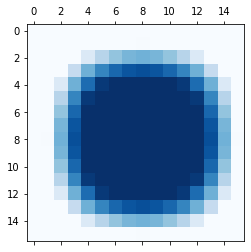

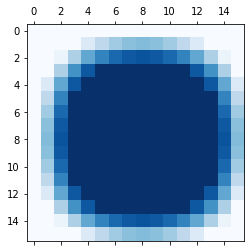

In [7]:
for t, N_a_t in enumerate(results['N_a']):
    grid_N_a_t = visualize.as_grid(N_a_t)
    visualize.plot_grid(grid_N_a_t, grid_N_a_t)

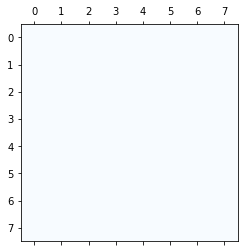

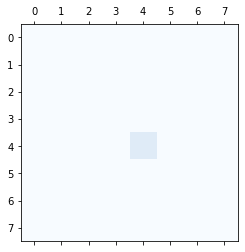

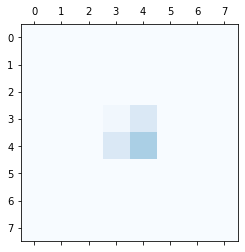

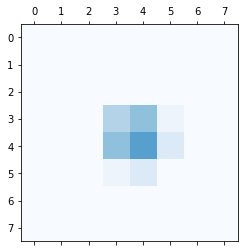

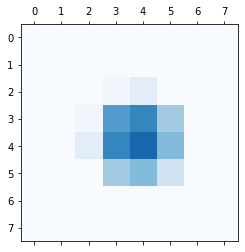

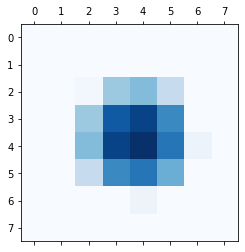

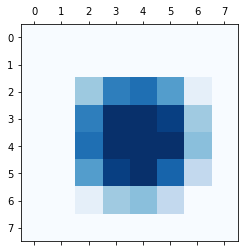

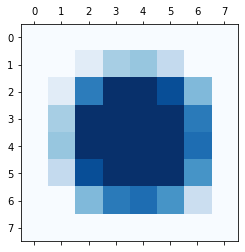

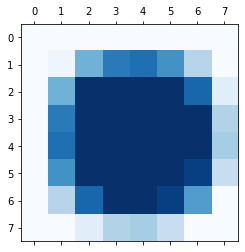

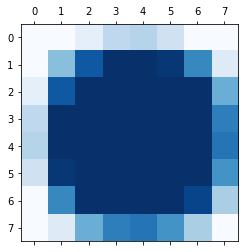

In [8]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t, grid_N_a_t)

In [9]:
results = evaluation.evaluate(M_a, projection_method=projections.Projections().sub_matrix_eigenvector, g_bas=[g_ba], N_a_0=N_a, num_steps=200,  lock_down_threshold=10, re_open_threshold=0.5, intervention_strategy=True)

/home/ubuntu/multi_scale_pandemic/visualize.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


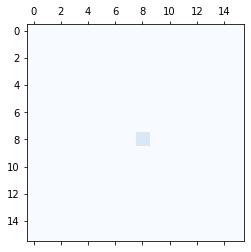

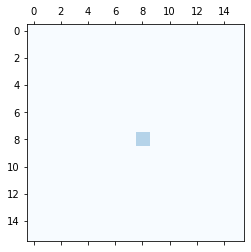

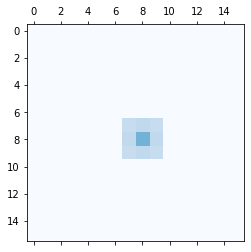

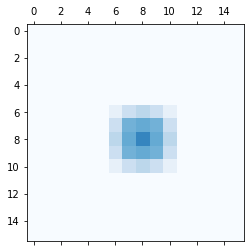

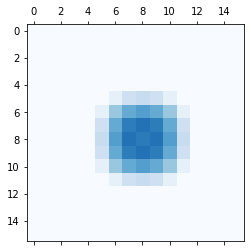

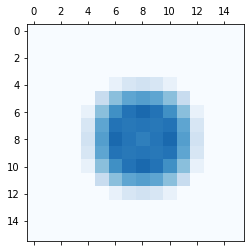

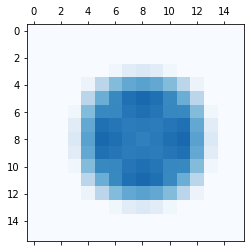

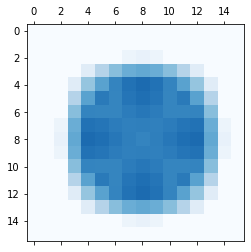

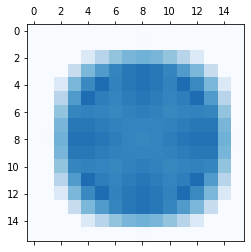

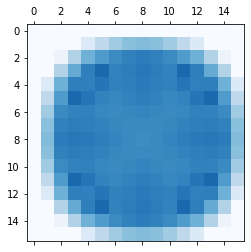

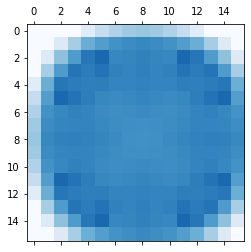

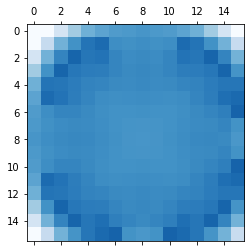

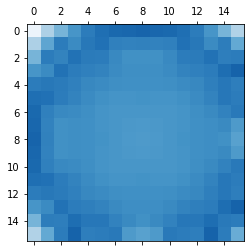

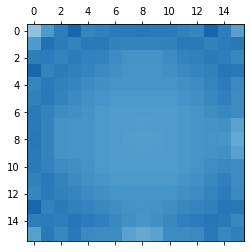

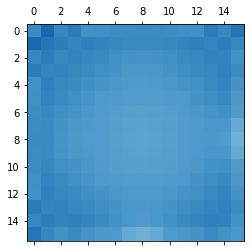

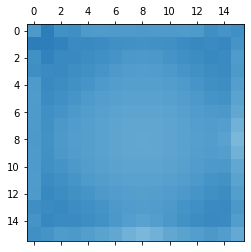

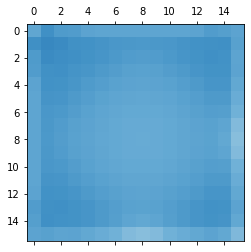

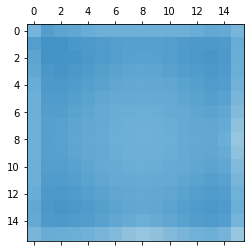

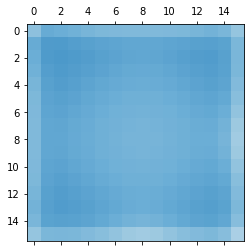

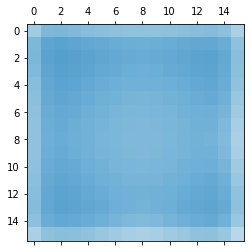

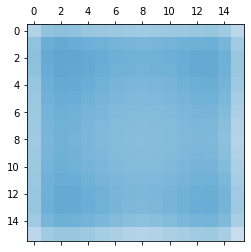

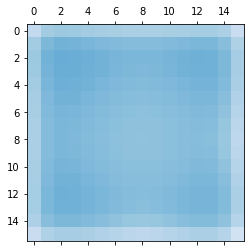

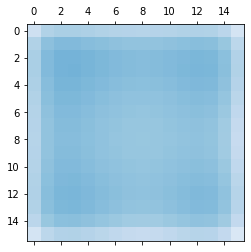

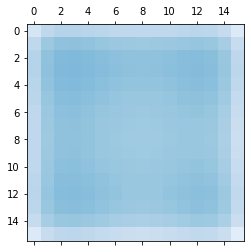

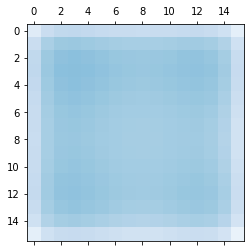

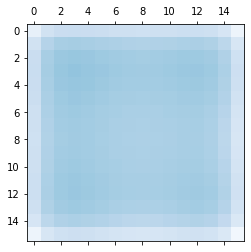

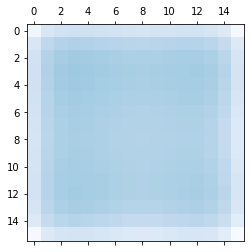

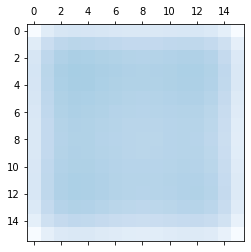

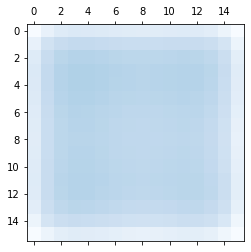

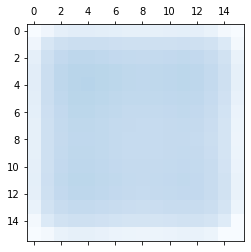

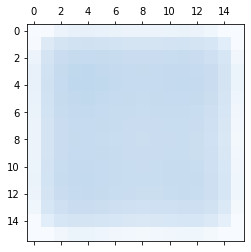

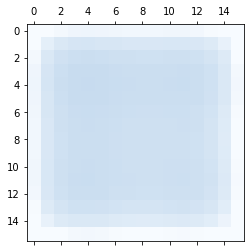

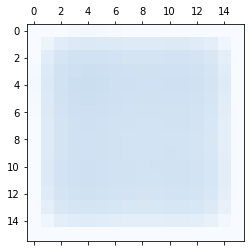

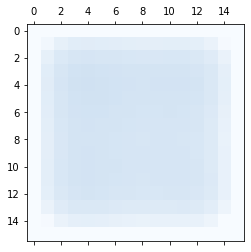

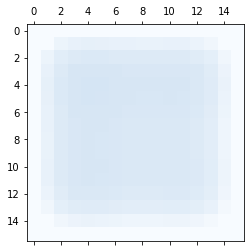

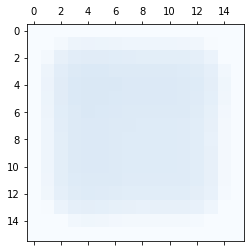

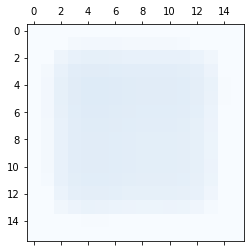

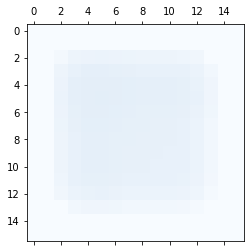

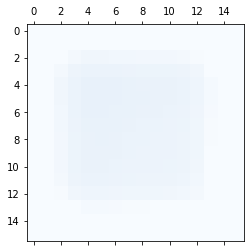

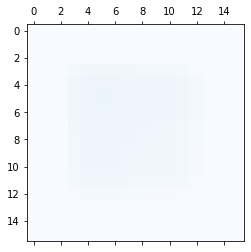

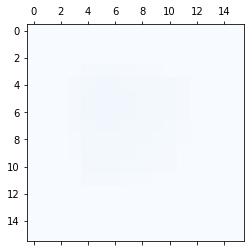

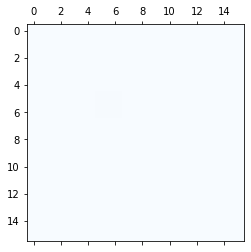

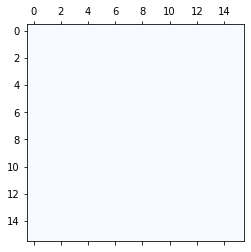

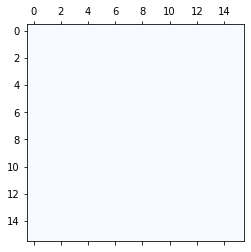

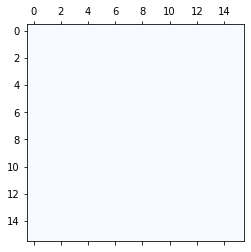

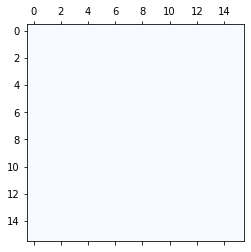

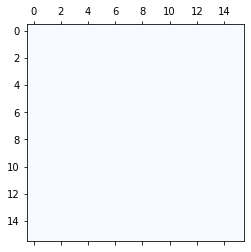

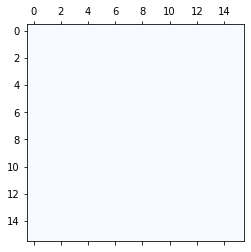

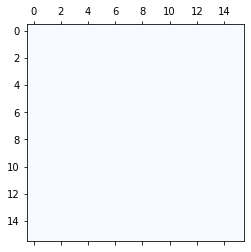

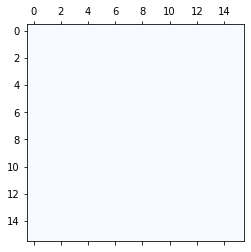

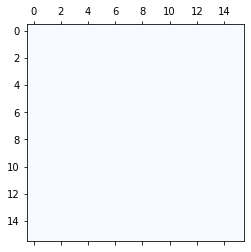

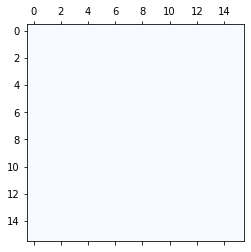

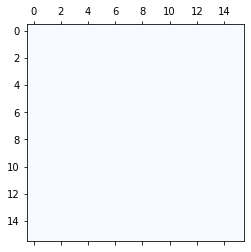

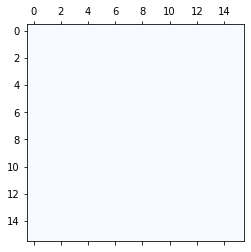

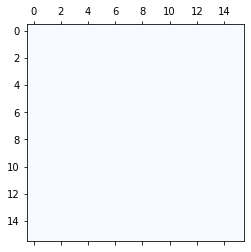

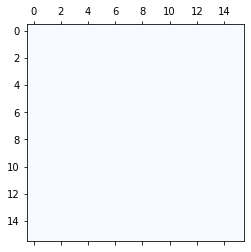

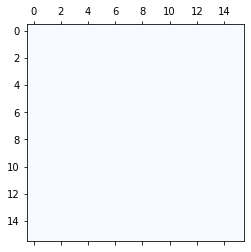

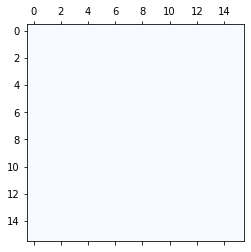

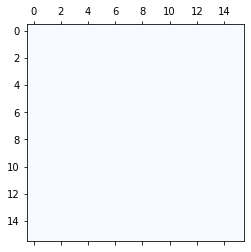

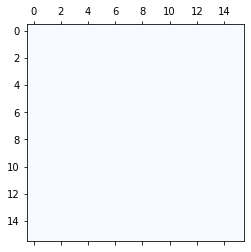

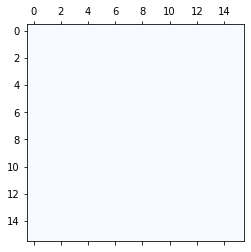

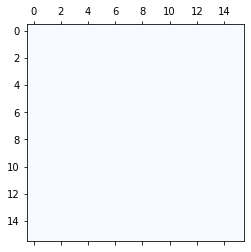

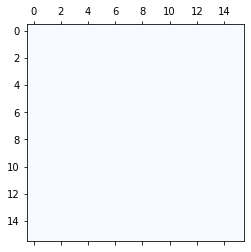

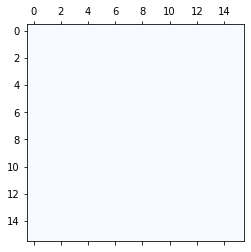

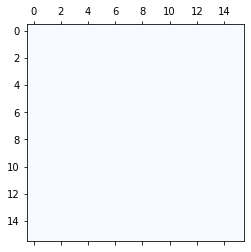

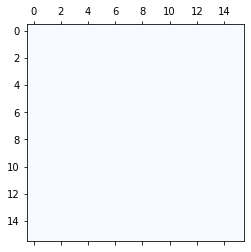

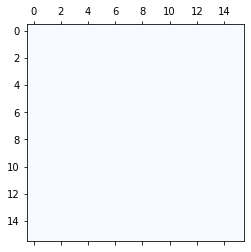

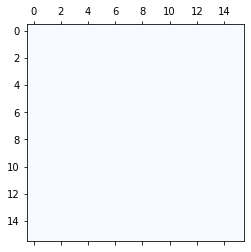

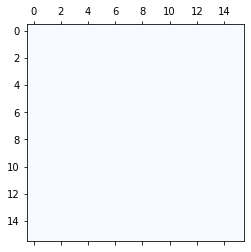

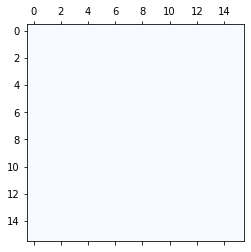

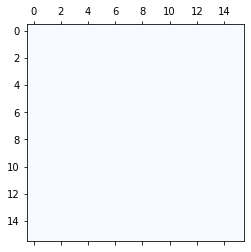

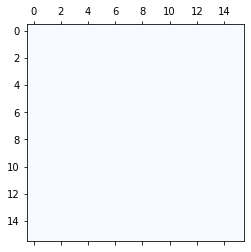

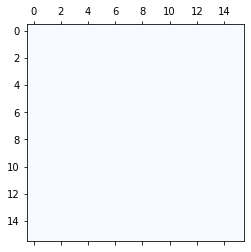

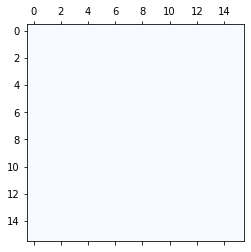

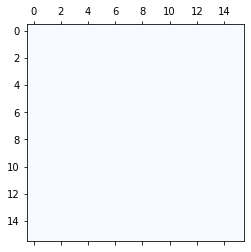

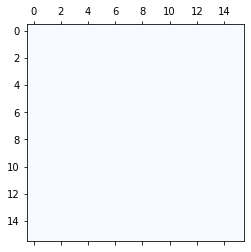

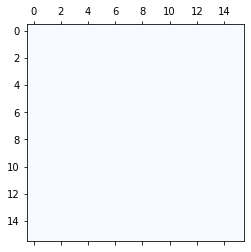

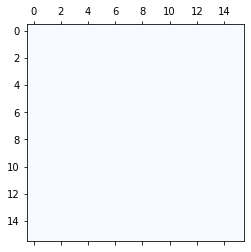

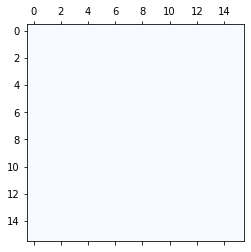

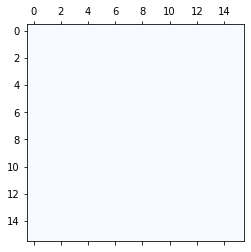

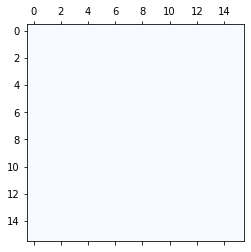

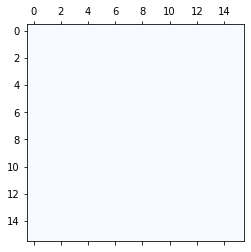

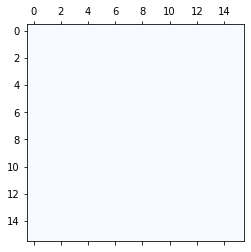

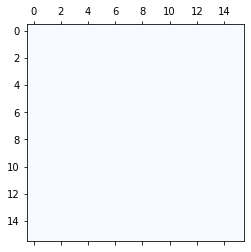

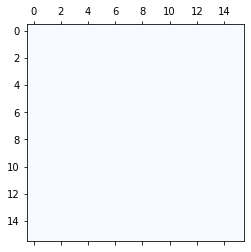

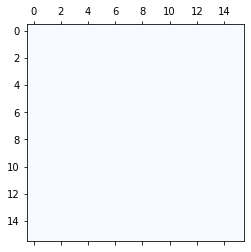

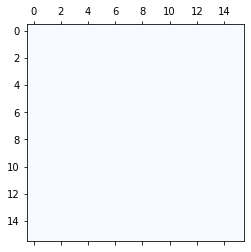

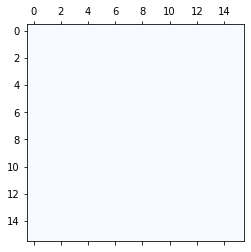

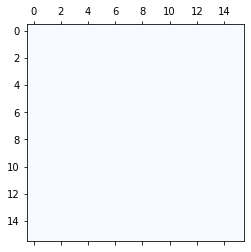

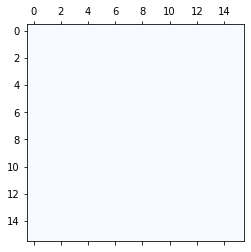

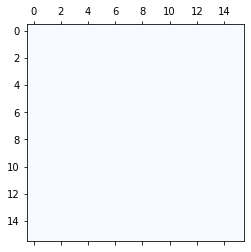

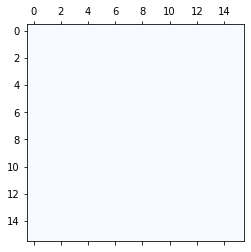

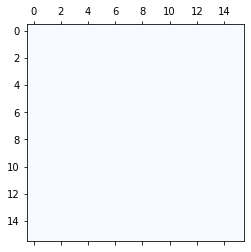

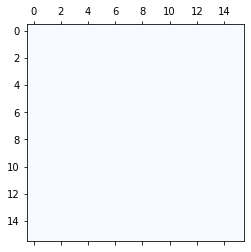

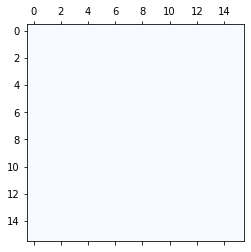

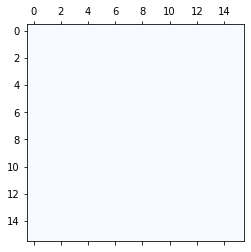

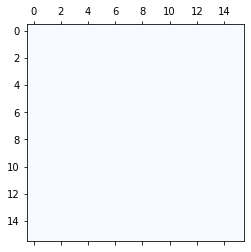

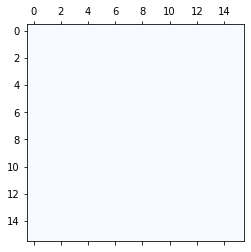

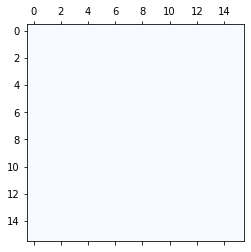

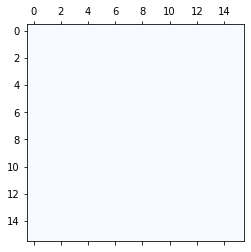

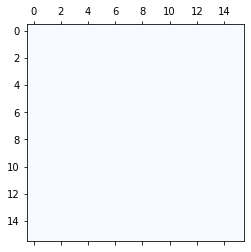

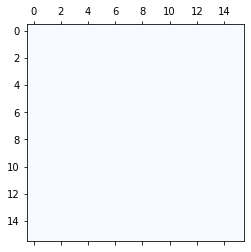

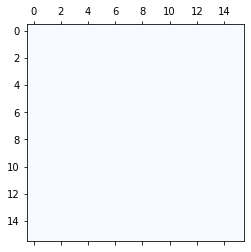

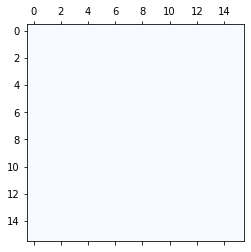

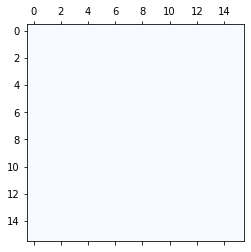

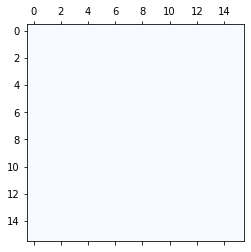

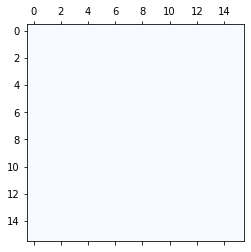

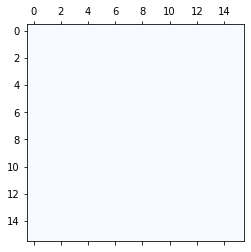

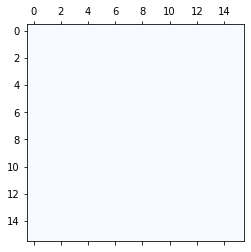

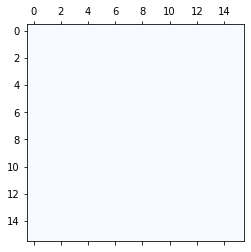

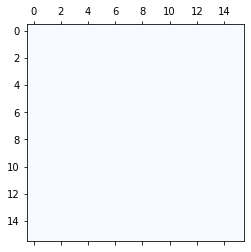

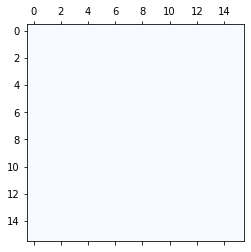

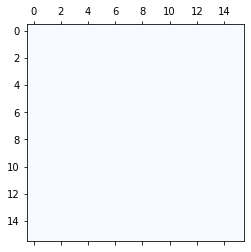

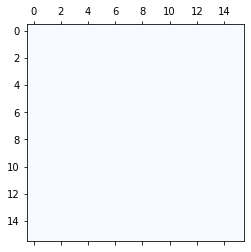

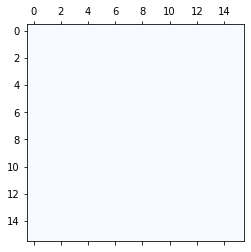

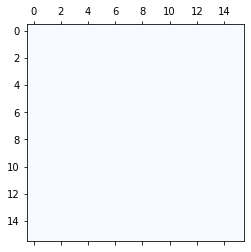

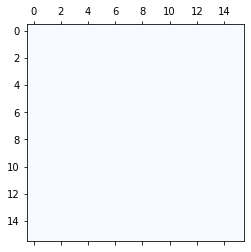

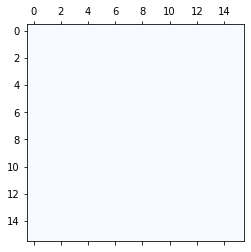

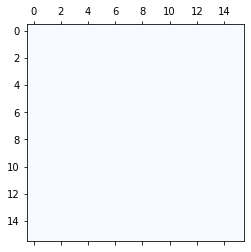

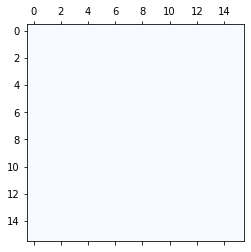

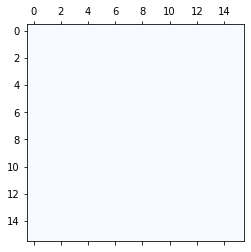

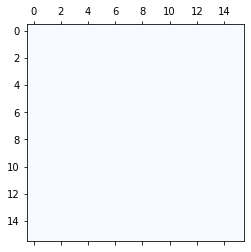

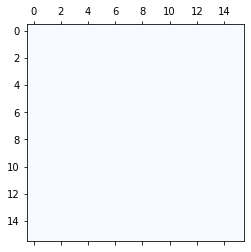

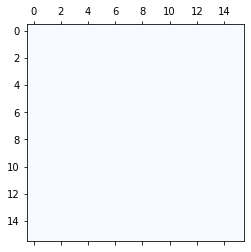

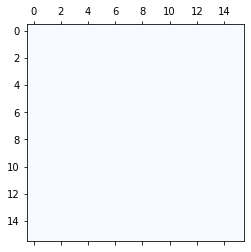

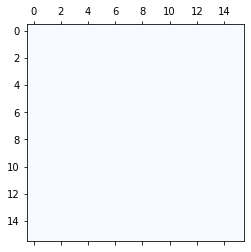

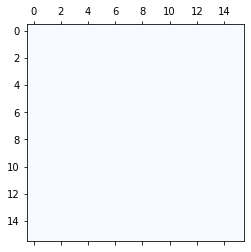

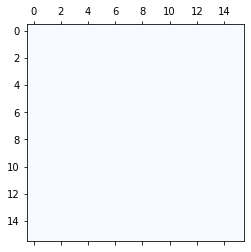

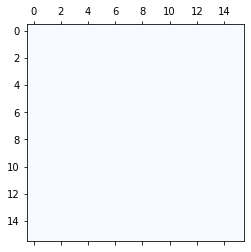

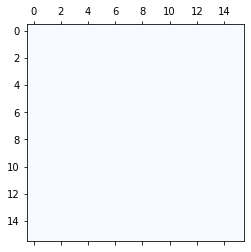

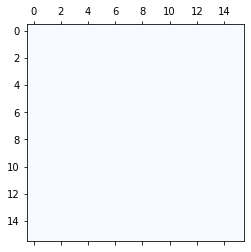

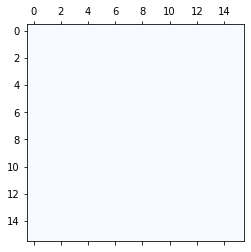

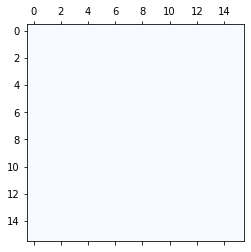

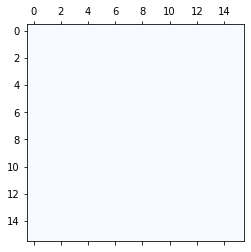

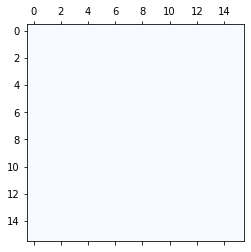

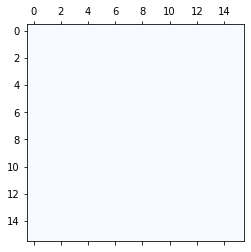

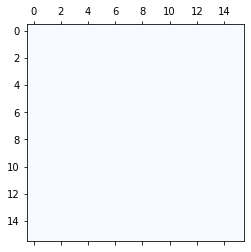

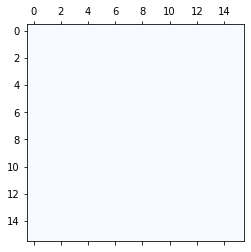

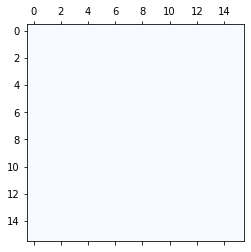

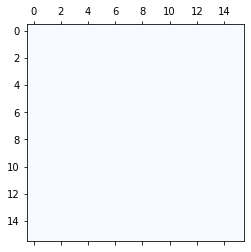

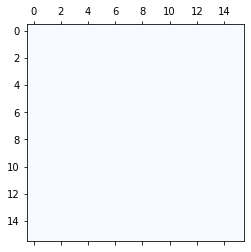

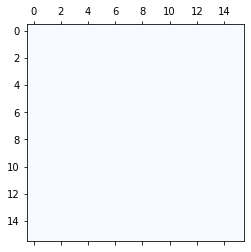

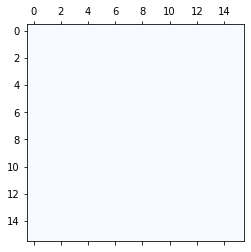

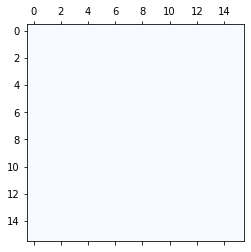

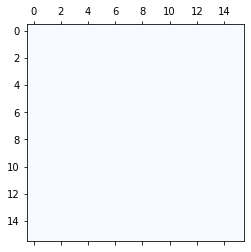

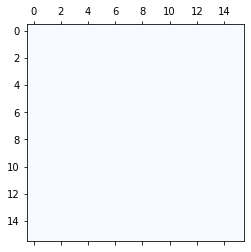

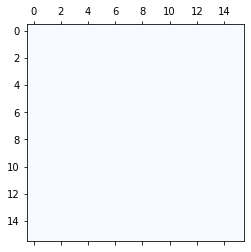

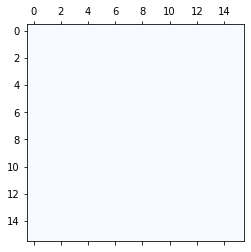

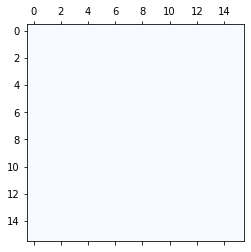

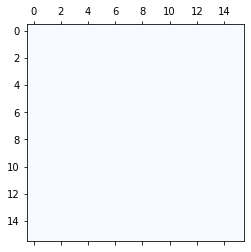

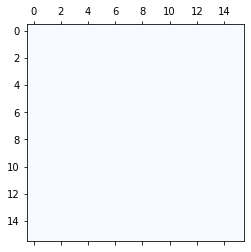

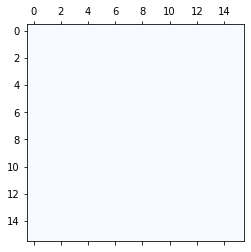

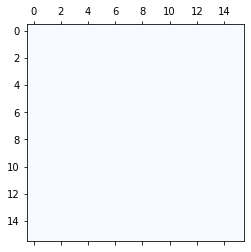

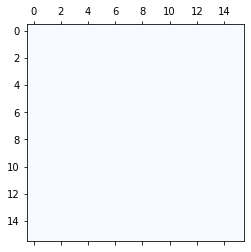

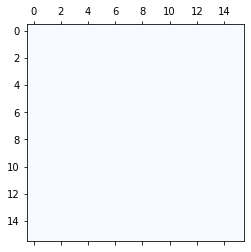

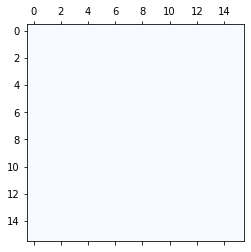

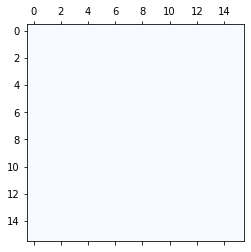

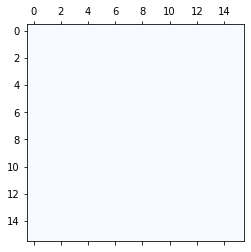

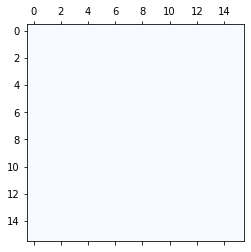

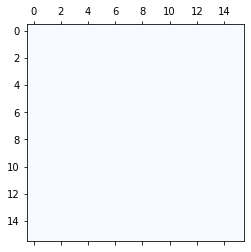

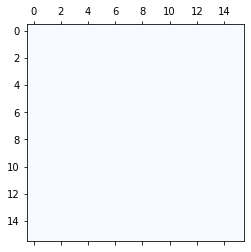

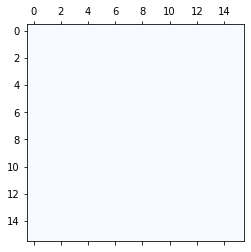

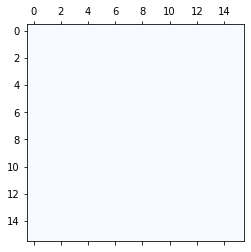

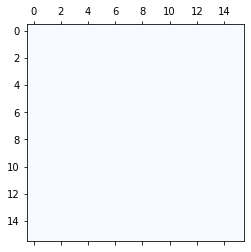

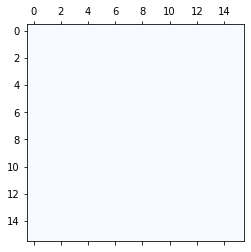

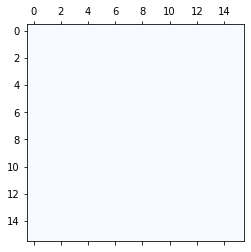

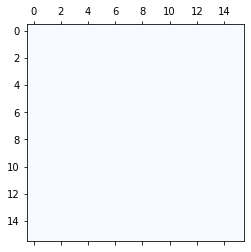

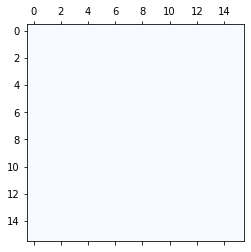

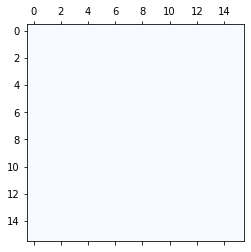

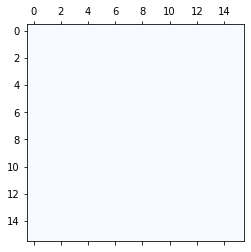

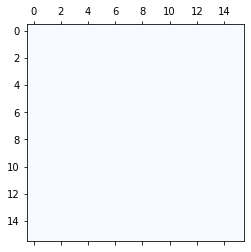

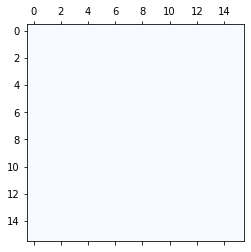

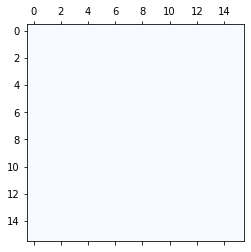

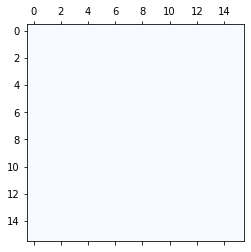

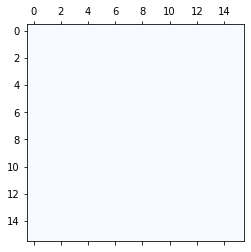

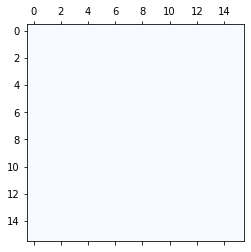

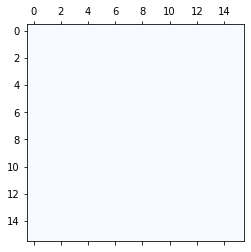

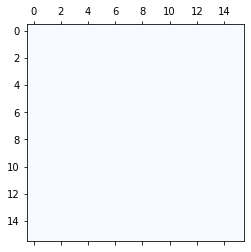

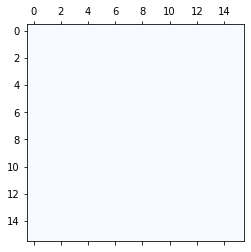

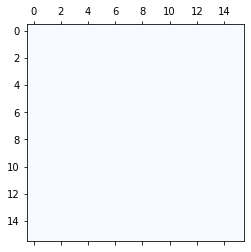

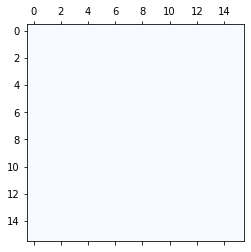

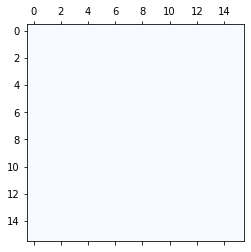

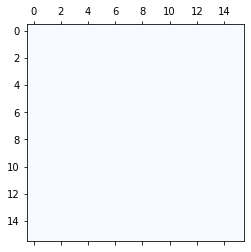

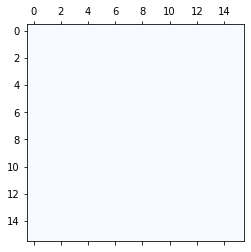

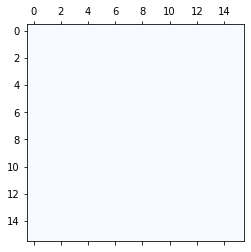

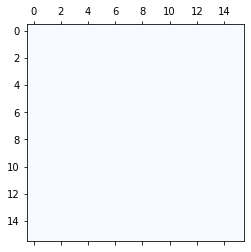

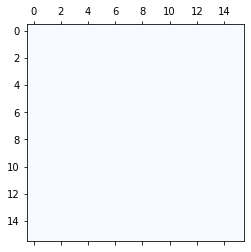

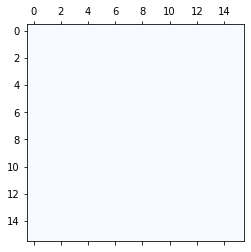

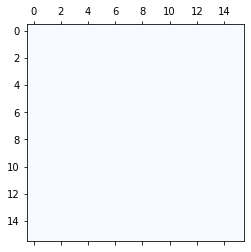

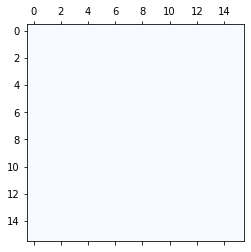

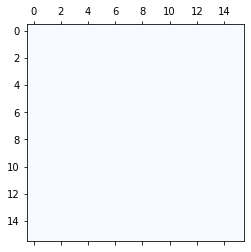

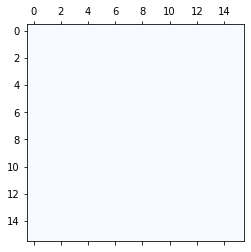

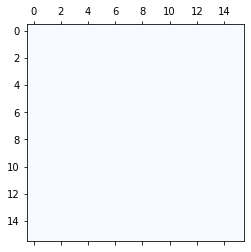

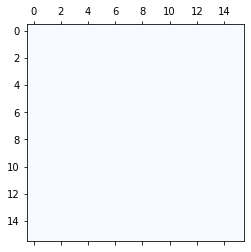

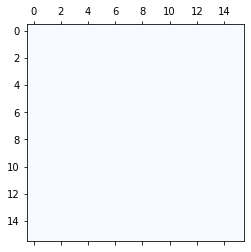

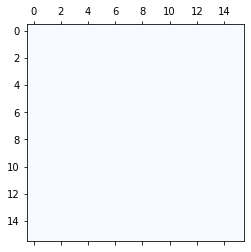

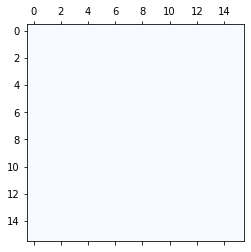

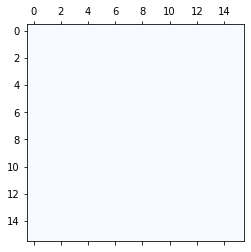

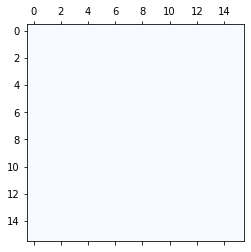

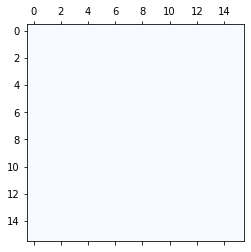

In [10]:
for t, N_a_t in enumerate(results['N_a']):
    grid_N_a_t = visualize.as_grid(N_a_t)
    visualize.plot_grid(grid_N_a_t, grid_N_a_t)

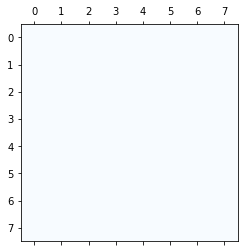

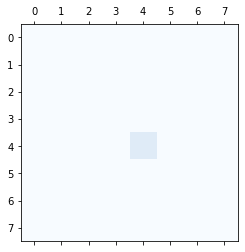

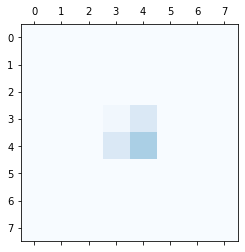

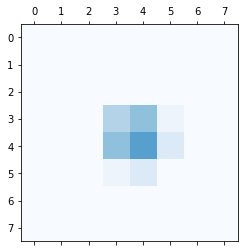

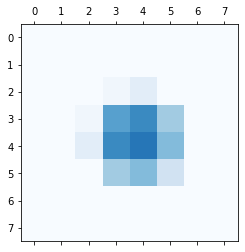

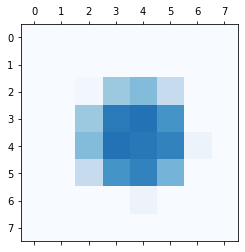

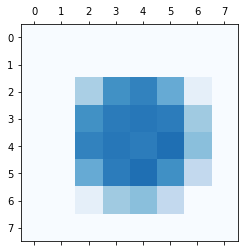

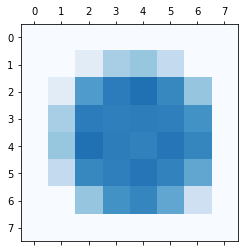

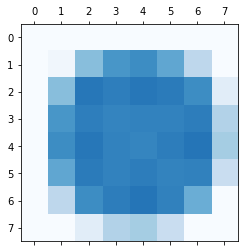

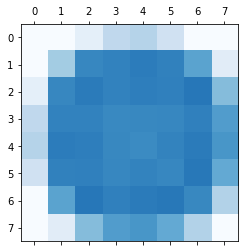

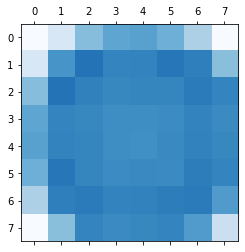

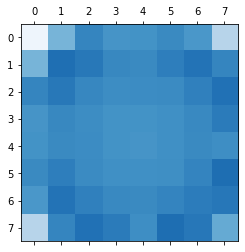

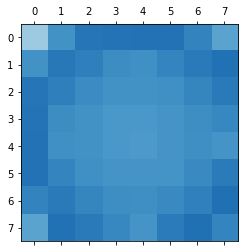

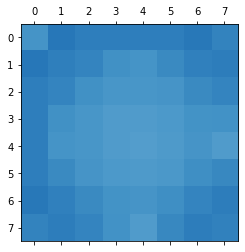

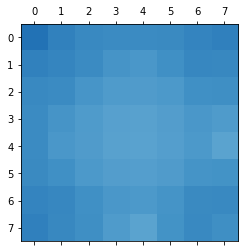

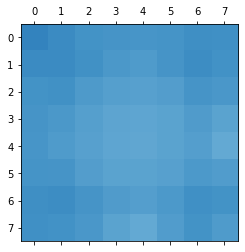

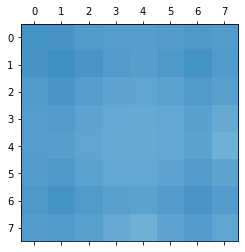

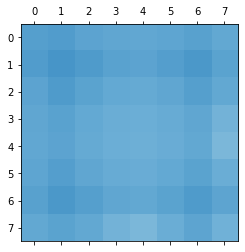

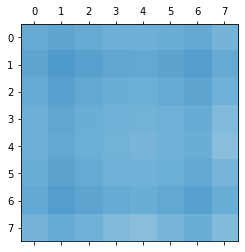

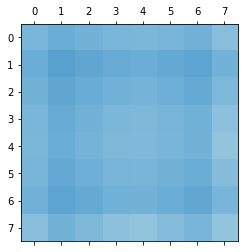

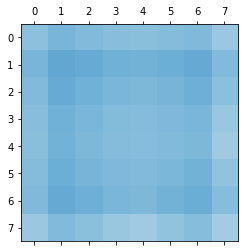

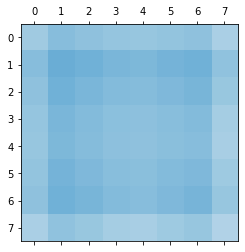

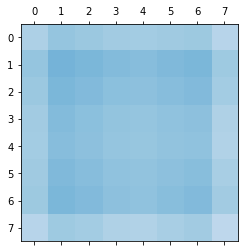

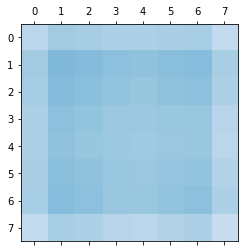

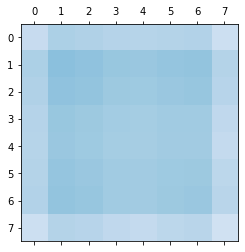

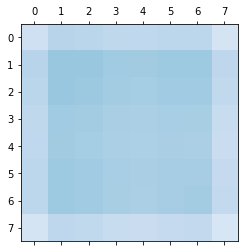

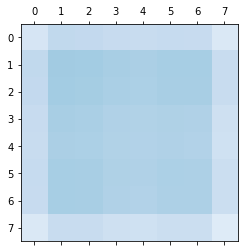

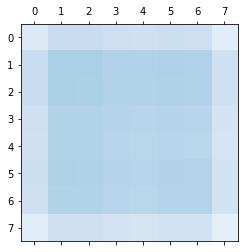

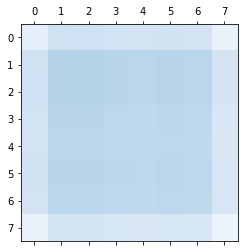

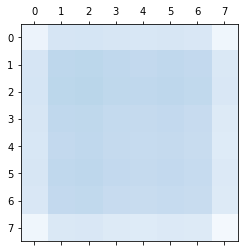

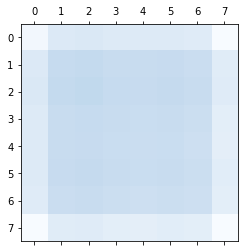

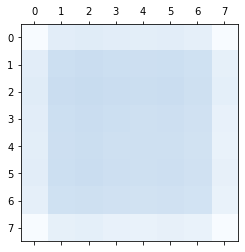

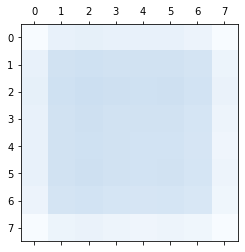

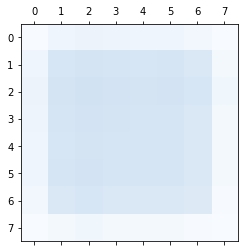

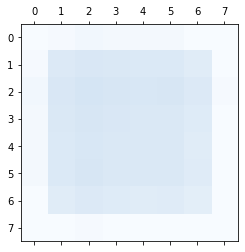

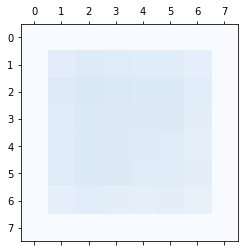

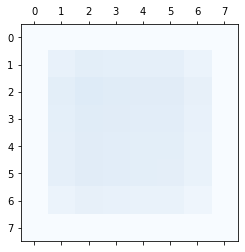

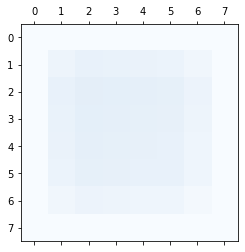

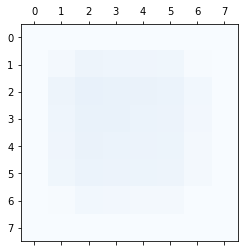

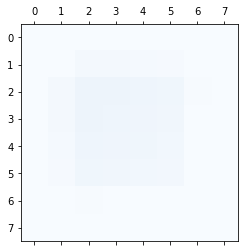

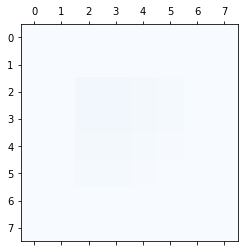

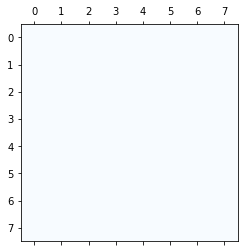

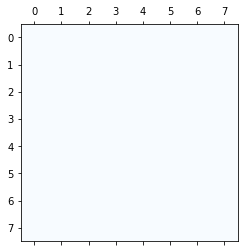

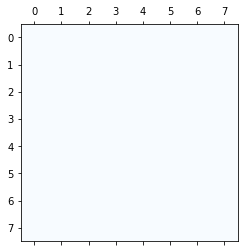

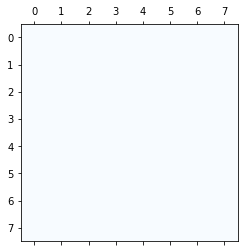

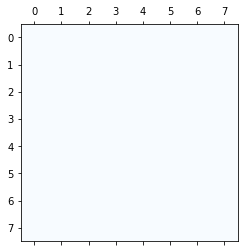

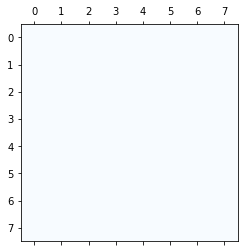

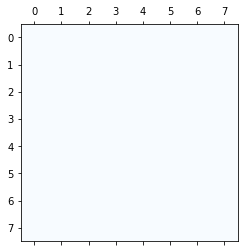

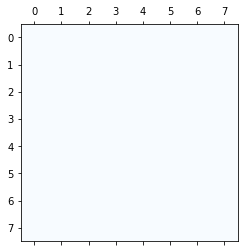

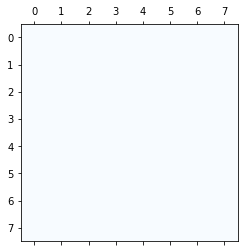

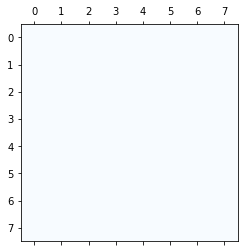

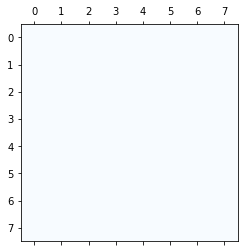

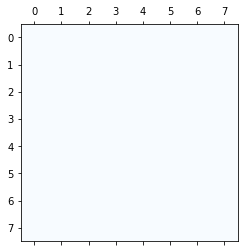

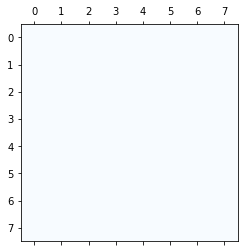

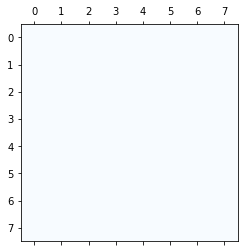

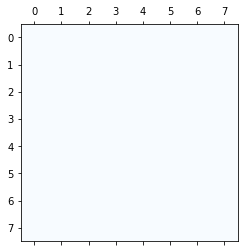

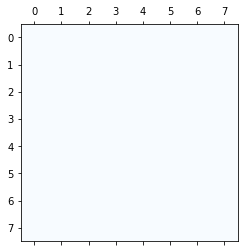

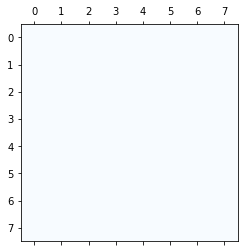

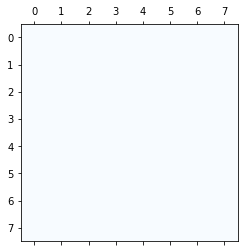

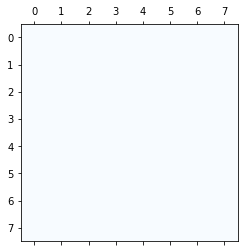

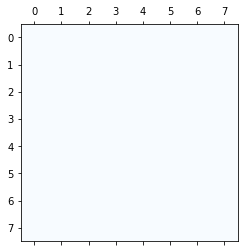

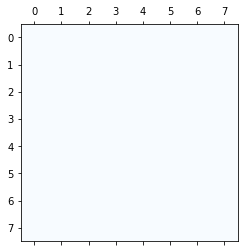

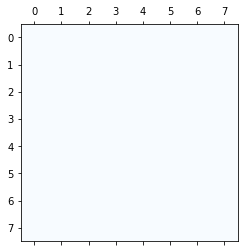

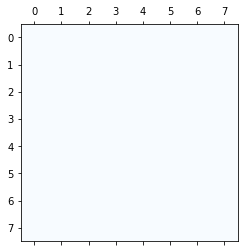

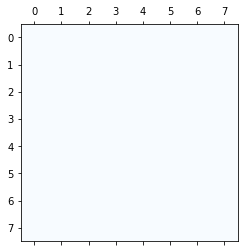

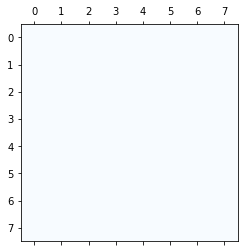

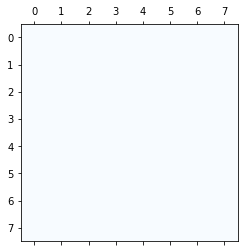

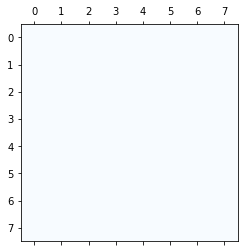

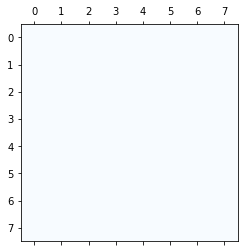

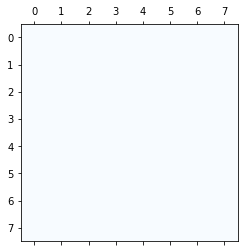

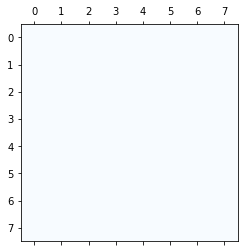

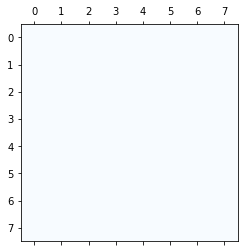

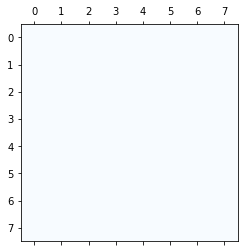

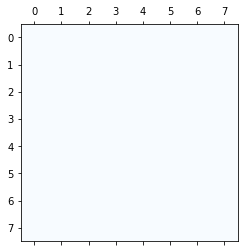

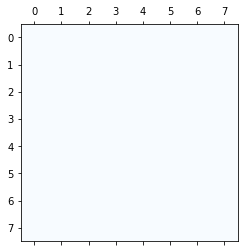

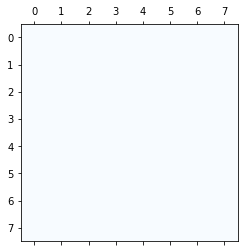

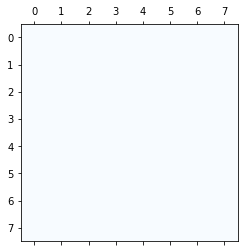

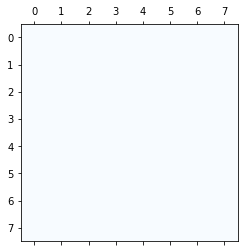

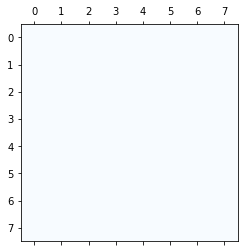

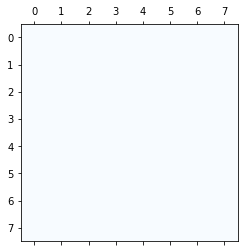

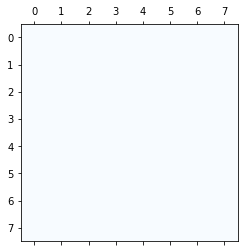

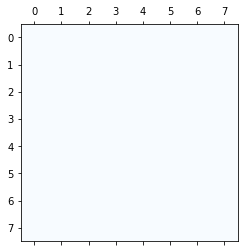

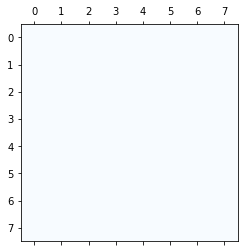

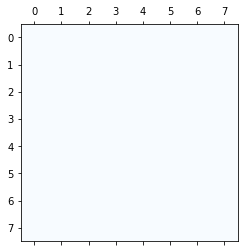

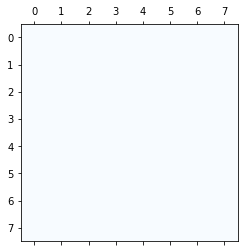

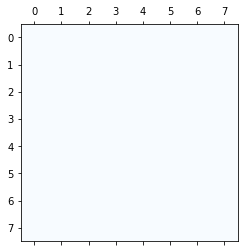

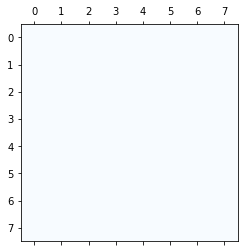

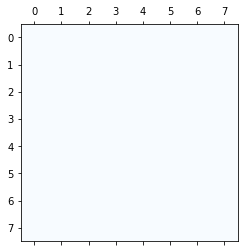

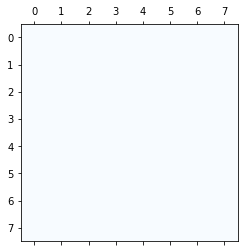

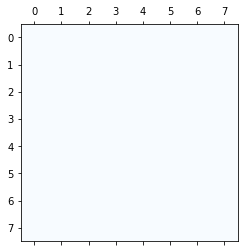

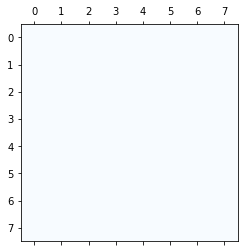

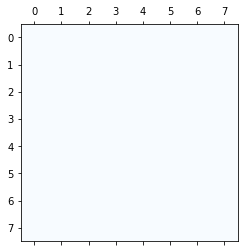

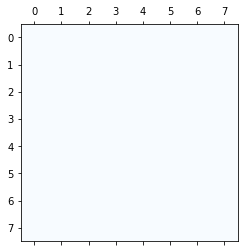

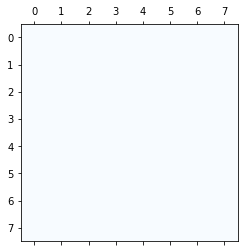

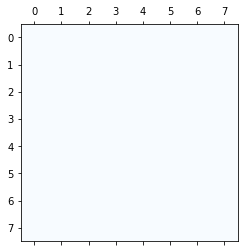

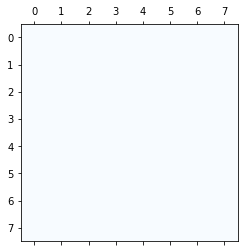

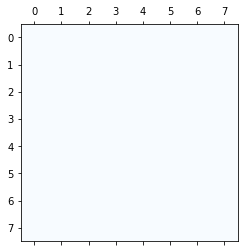

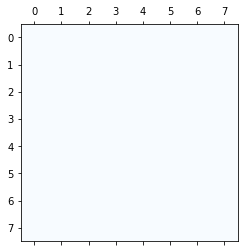

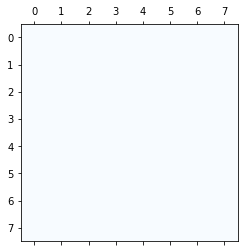

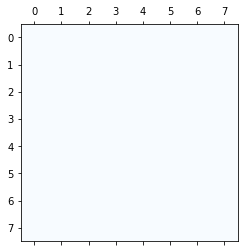

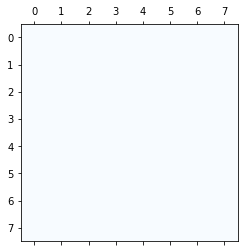

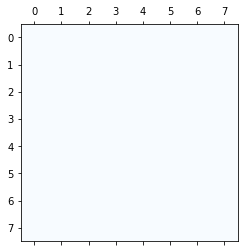

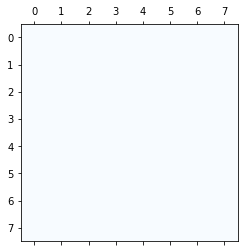

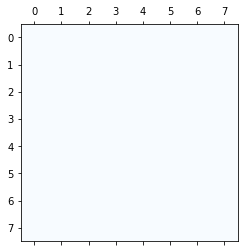

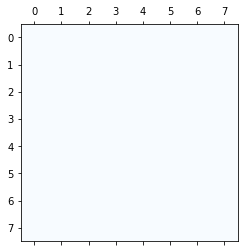

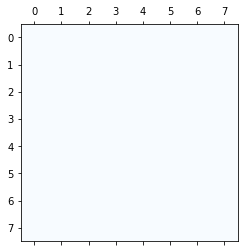

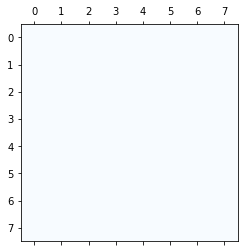

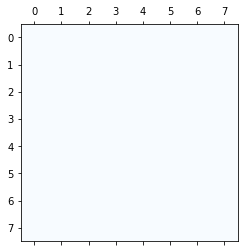

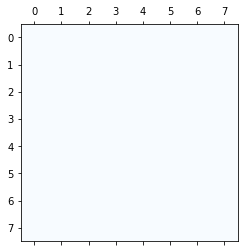

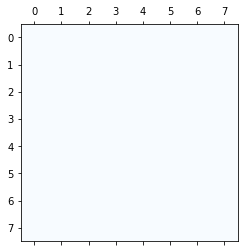

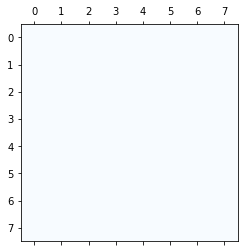

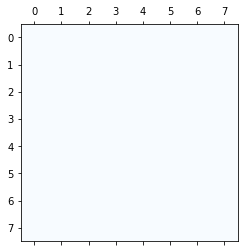

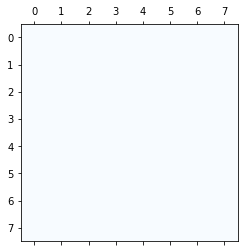

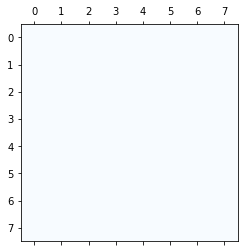

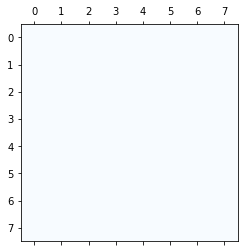

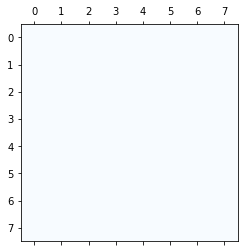

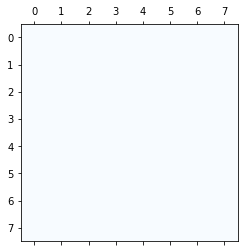

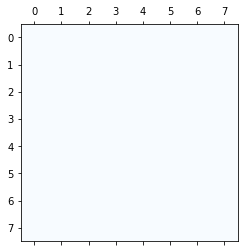

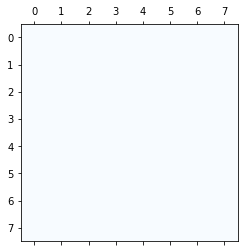

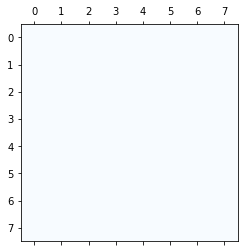

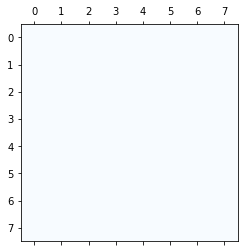

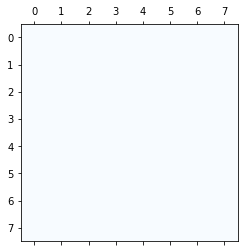

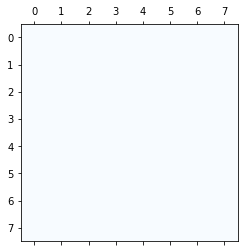

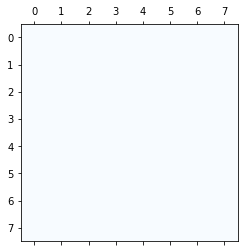

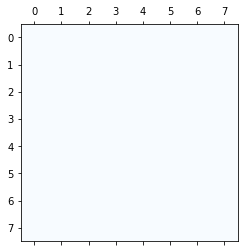

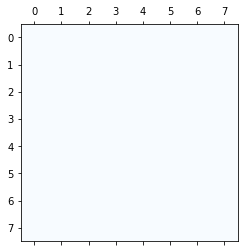

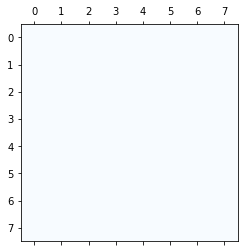

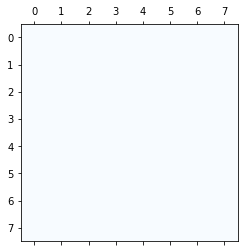

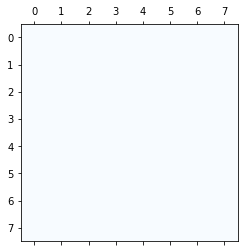

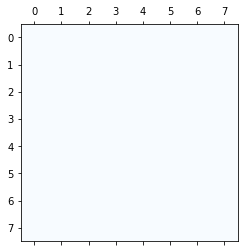

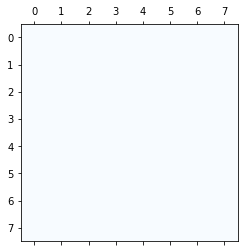

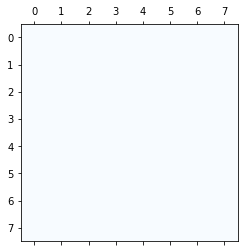

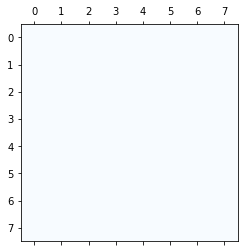

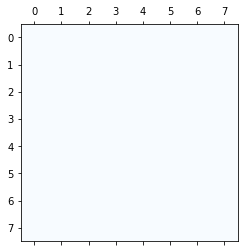

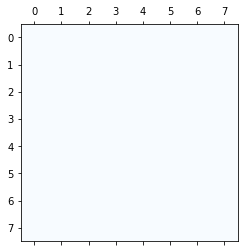

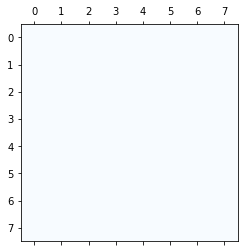

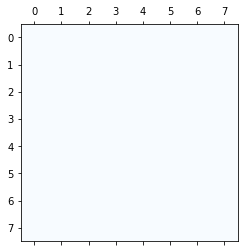

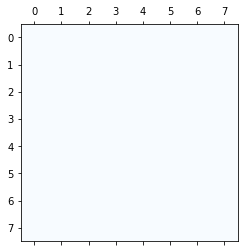

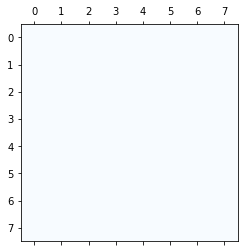

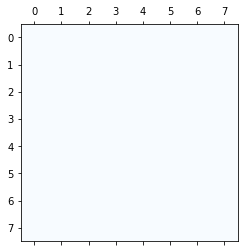

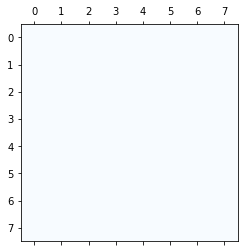

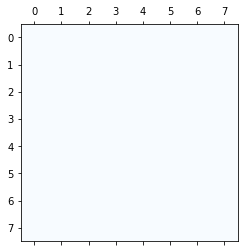

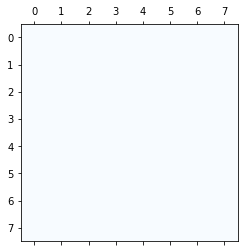

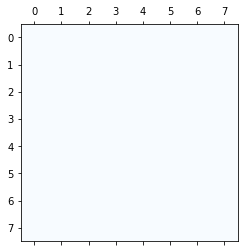

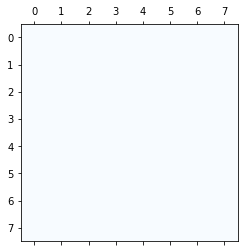

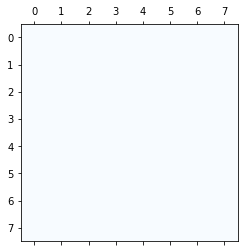

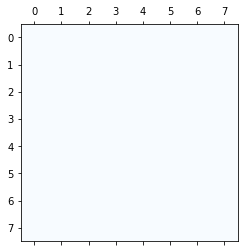

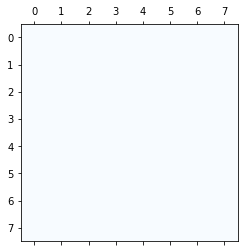

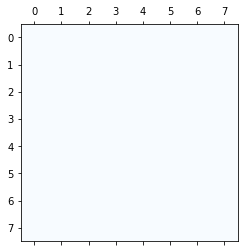

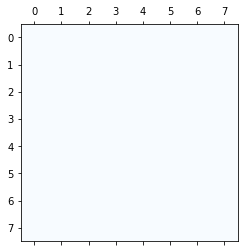

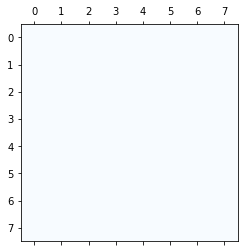

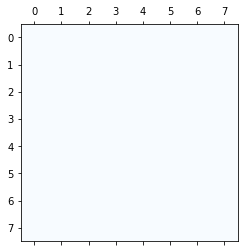

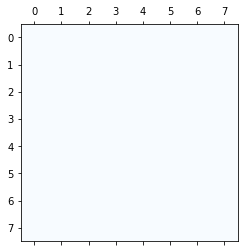

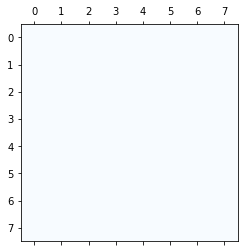

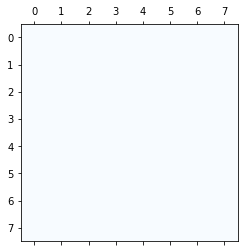

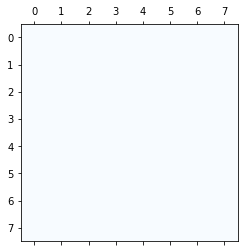

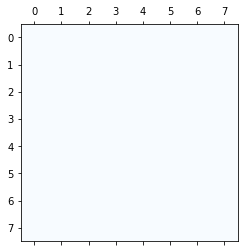

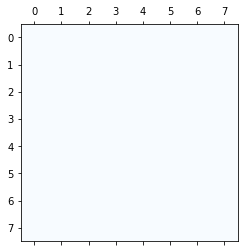

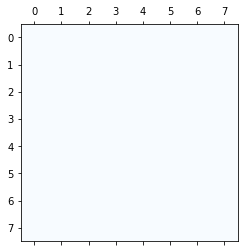

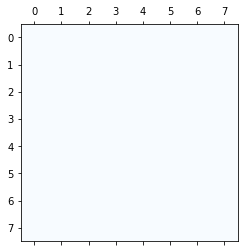

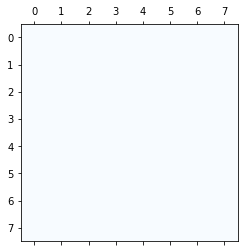

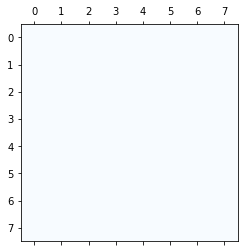

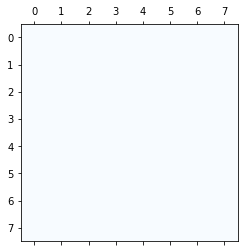

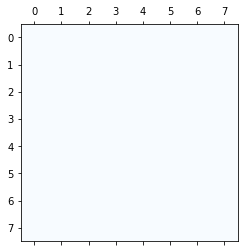

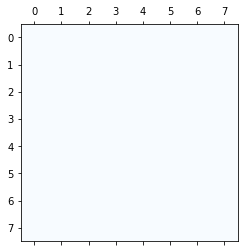

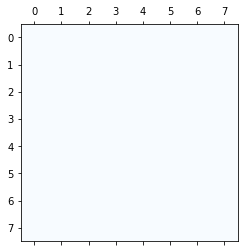

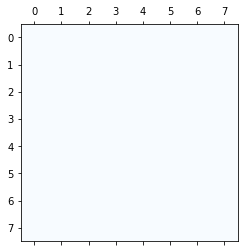

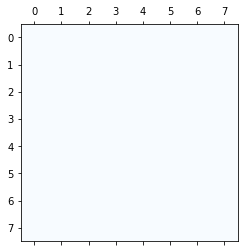

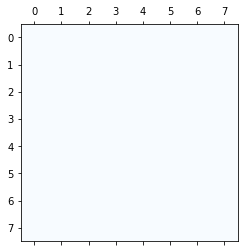

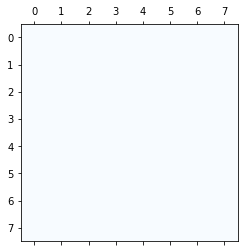

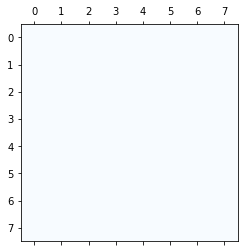

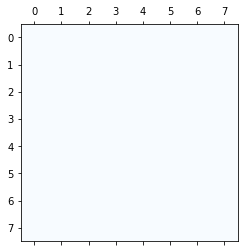

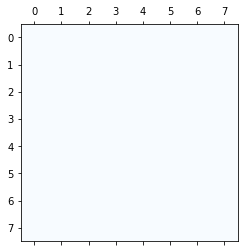

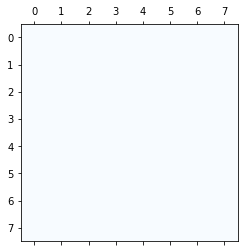

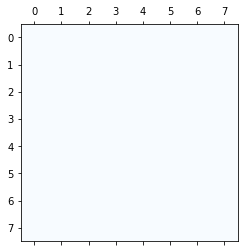

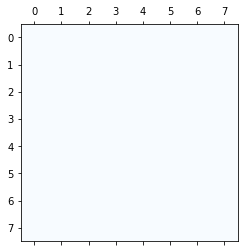

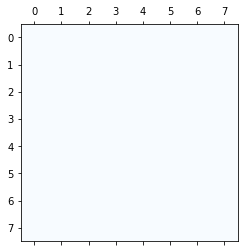

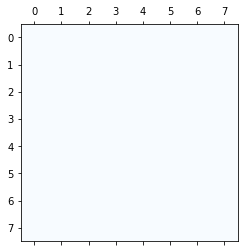

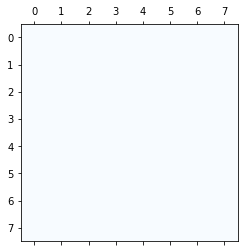

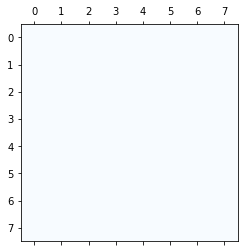

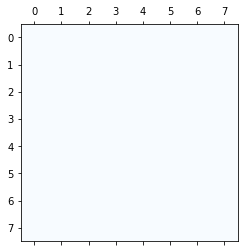

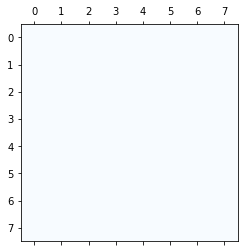

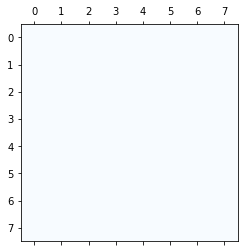

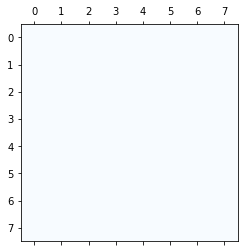

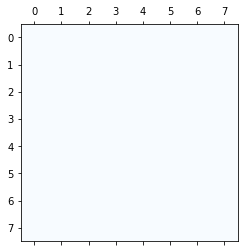

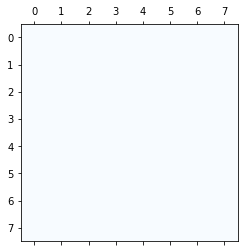

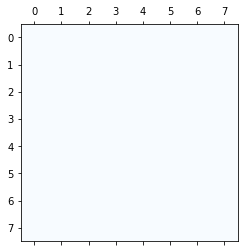

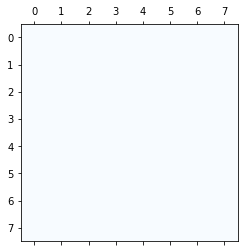

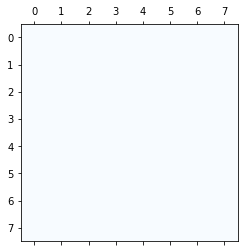

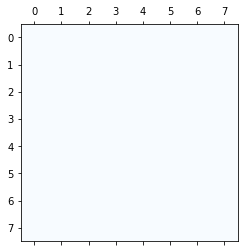

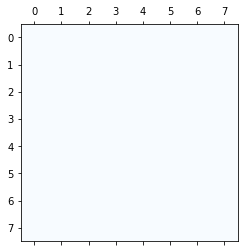

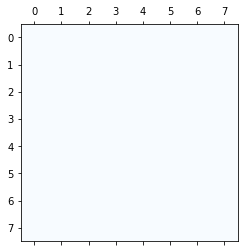

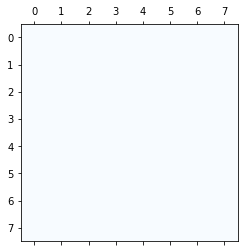

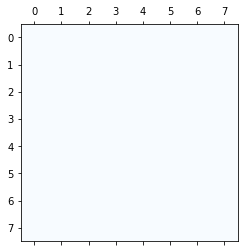

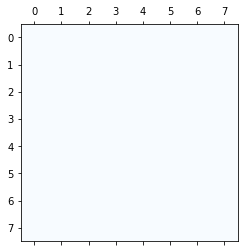

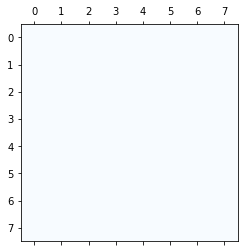

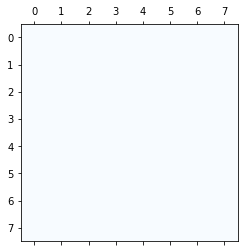

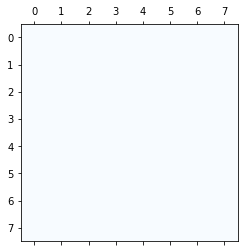

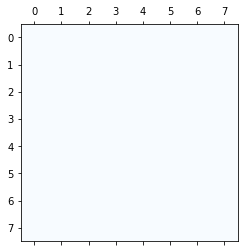

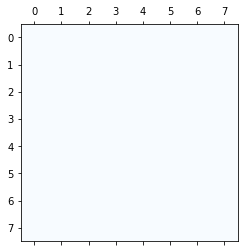

In [11]:
for t, N_b_t in enumerate(results['N_bs'][1]):
    grid_N_b_t = visualize.as_grid(N_b_t)
    visualize.plot_grid(grid_N_b_t, grid_N_a_t)

In [12]:
#M_b_0 # M_a   --> element-wise multiply entries {(i, j)} by \delta M_b  < 1 as a function of N_a
#M_b_1 #        --> 
#...
#M_b_n